<a href="https://colab.research.google.com/github/ArslanAmanov/AI-ML-DL/blob/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/uci_ml%20drug%20test%20ML_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Drug Ratings Dataset: Preliminary Data Exploration**

*Preliminary Exploration:*


*   Most common conditions
*   Overall best and worst reviewed drugs


*   The curability of each disease
*   Best drugs for each condition

*   Most useful reviews
*   Usefulness vs review score

*   Bias in reviews
*   Users tend to review things they really like or really disliked,fewer reviews in the middle.









In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style; style.use('ggplot')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Importing the datasets and libraries
url_1_test='https://raw.githubusercontent.com/ArslanAmanov/AI-ML-DL/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/drugsComTest_raw.csv'
url_2_train='https://raw.githubusercontent.com/ArslanAmanov/AI-ML-DL/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/drugsComTrain_raw.csv'
test = pd.read_csv(url_1_test)
train = pd.read_csv(url_2_train)

In [3]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [5]:
list(train)==list(test)

True

Both train and test have the same features.Maybe they are split up to allow us to train/test our models easily.

In [ ]:
list(train)

['uniqueID',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [6]:
train.values.shape[0], test.values.shape[0], train.values.shape[0]/test.values.shape[0]

(161297, 53766, 2.999981400885318)

Yes, the train set is almost exactly 3 times as big as the test set. This is typical 75:25 train:test split.

In [ ]:
train.condition.unique().size, test.condition.unique().size

(885, 709)




*   885 unique conditions on train data
*   709 unique conditions on test data  



In [ ]:
train.drugName.unique().size, test.drugName.unique().size

(3436, 2637)



*   3436 unique drugName on train data
*   2637 unique drugName on test data



**Common Conditions**

In [9]:
conditions = train.condition.value_counts().sort_values(ascending=False)
conditions[:10]

,count
condition,
Birth Control,28788
Depression,9069
Pain,6145
Anxiety,5904
Acne,5588
Bipolar Disorde,4224
Insomnia,3673
Weight Loss,3609
Obesity,3568


In [10]:
plt.rcParams['figure.figsize']=[10,6]

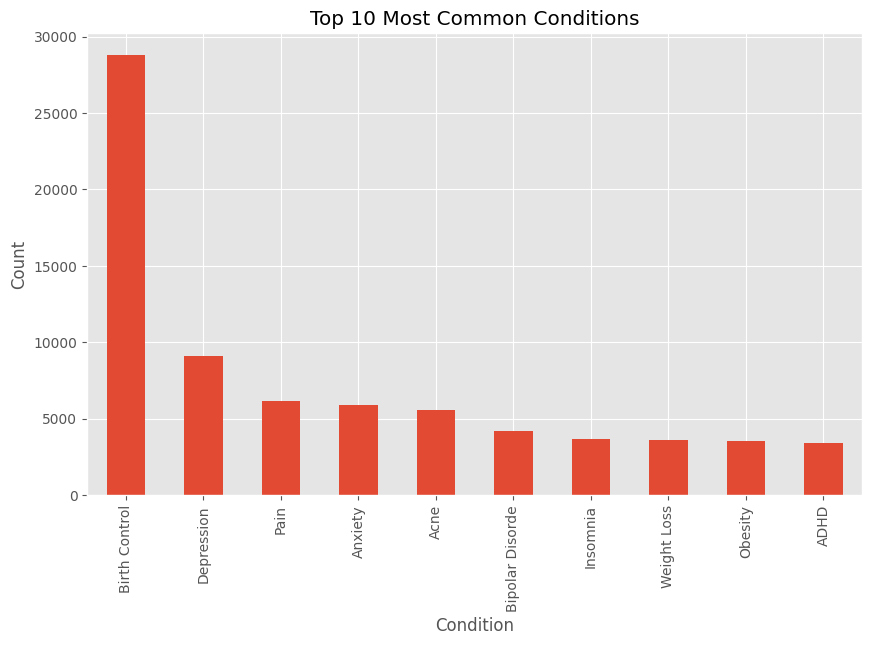

In [11]:
conditions[:10].plot(kind='bar')
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Condition')
plt.ylabel('Count');

**Rating Distribution**

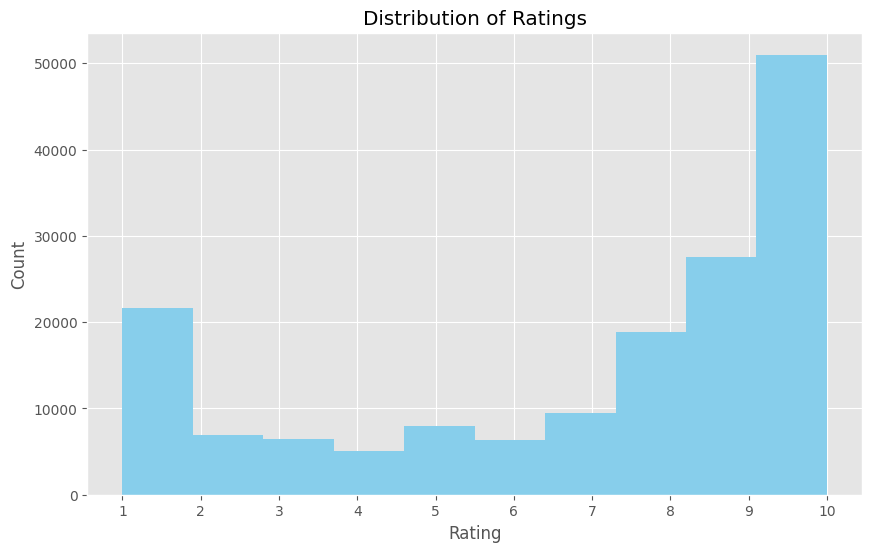

In [12]:
# Look at bias in review(also shown on 'Data' page in competition:distribution of ratings)
train.rating.hist(color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([i for i in range(1,11)]);

#**Critical Review**
This distribution illustrates that people generally write reviews for drugs they really like(or those that they really dislike) There are fewer middle ratings as compared to extreme ratings.

Text(0, 0.5, 'Count')

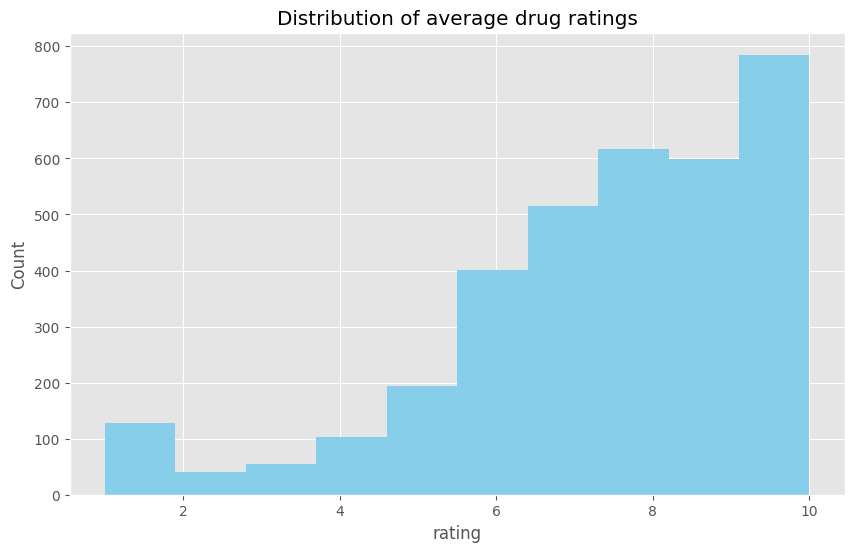

In [13]:
rating_avg = (train['rating'].groupby(train['drugName']).mean())
rating_avg.hist(color='skyblue')
plt.title('Distribution of average drug ratings')
plt.xlabel('rating')
plt.ylabel('Count')

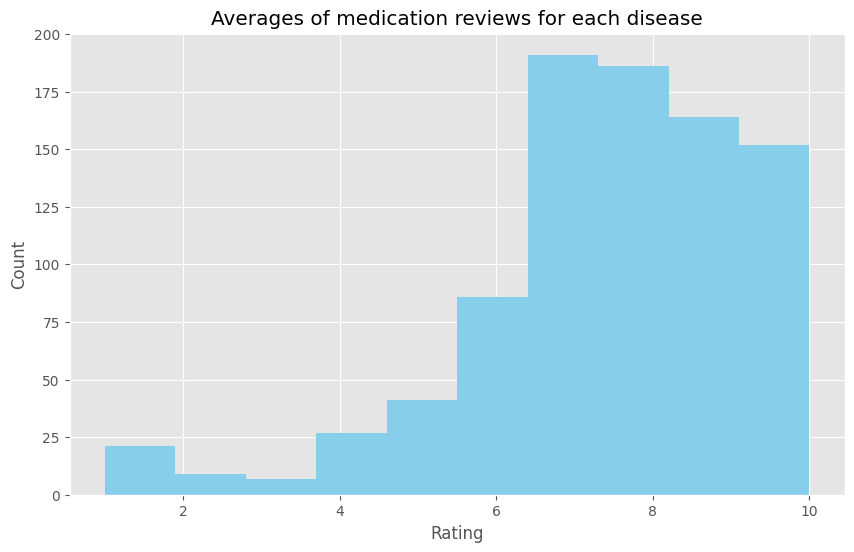

In [14]:
rating_avgs = (train['rating'].groupby(train['condition']).mean())
rating_avgs.hist(color='skyblue')
plt.title('Averages of medication reviews for each disease')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show();

# Usefullness vs Rating

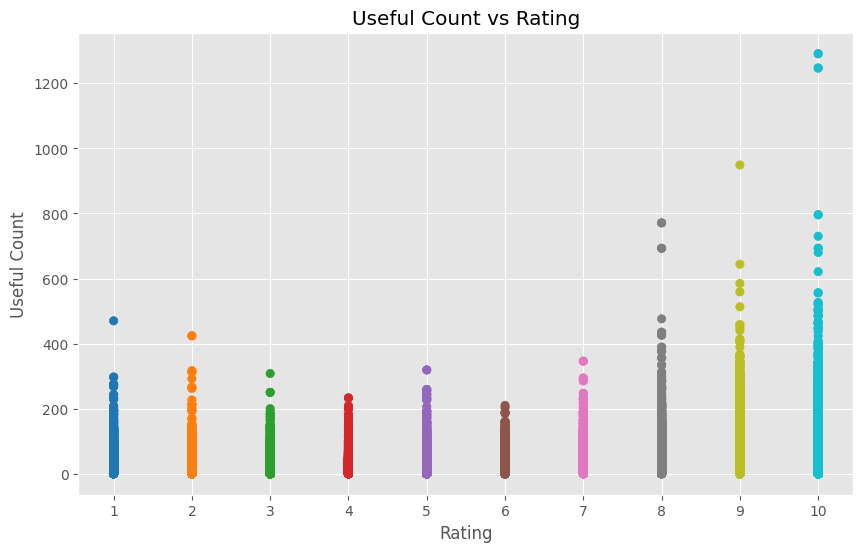

In [15]:
# Is rating correlated with usefulness of the review?
plt.scatter(train.rating, train.usefulCount, c=train.rating.values, cmap='tab10')
plt.title('Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.xticks([i for i in range(1,11)]);

In [16]:
# Create a list (cast into an array) containing the average usefulness for given ratings

use_ls = []

for i in range(1,11):
  use_ls.append([i, np.sum(train[train.rating==i].usefulCount)/np.sum([train.rating==i])])

use_arr=np.asarray(use_ls)

([<matplotlib.axis.XTick at 0x7dc55ec14d30>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

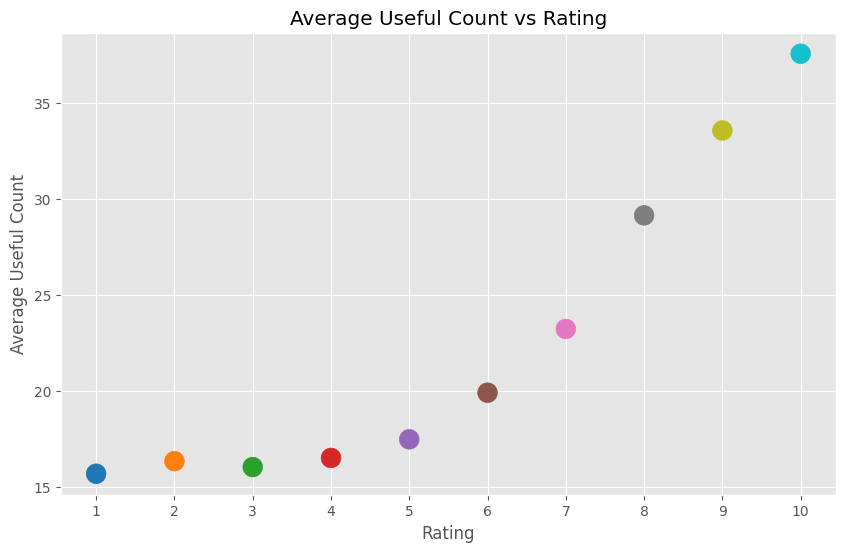

In [17]:
plt.scatter(use_arr[:,0], use_arr[:,1], c=use_arr[:,0], cmap='tab10', s=200)
plt.title('Average Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.xticks([i for i in range(1,11)])

#**Insight**
Looks like people found reviews with higher scores to be more useful!
In the sense that reviews with high ratings recieved more 'useful' tags than reviews with low ratings.

I'm curious: what makes a review useful? Let's look at some of the most useful reviews:




In [18]:
# Sort train dataframe from most to least useful

useful_train = train.sort_values(by='usefulCount', ascending=False)
useful_train.iloc[:10]

,uniqueID,drugName,condition,review,rating,date,usefulCount
6716,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
33552,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
21708,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
4249,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
146145,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949
16889,52305,Adipex-P,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
58608,139141,Phentermine,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
2039,62757,Citalopram,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
152838,89825,Celexa,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
5218,107655,Implanon,Birth Control,"""I was very nervous about trying Implanon afte...",10,19-Jul-10,730


In [ ]:
# Print top 10 most useful reviews
for i in useful_train.review.iloc[:3]:
  print(i,'\n')

"I remember reading people&#039;s opinions, online, of the drug before I took it and it scared me away from it. Then I finally decided to give it a try and it has been the best choice I have made. I have been on it for over 4 months and I feel great. I&#039;m on 100mg and I don&#039;t have any side effects. When I first started I did notice that my hands would tremble but then it subsided. So honestly, don&#039;t listen to all the negativity because what doesn&#039;t work for some works amazing for others. So go based on youself and not everyone else. It may be a blessing in diguise. The pill is not meant to make you be all happy go lucky and see &quot;butterflies and roses&quot;, its meant to help put the chemicals in your mind in balance so you can just be who you are and not overly depressed. I still get sad some times, but that is normal, that is life, and it&#039;s up to people to take control to make a change. I did so by getting on this pill." 

"I remember reading people&#039;s

The useful reviews seem positive. Let's see some not-so-useful reviews.

In [ ]:
# Print 10 of the least useful reviews
for i in useful_train.review.iloc[-3:]:
  print(i, '\n')

"I had this implanted Jan2015. The first year it made me moody, depressed, and my sex drive plummeted! Not good because that has effected my marriage! My cycles have been longer, light enough to only need a liner or thin pad. But lately they have been heavier wear I needed a tampon. Now they are getting longer. So my moods, depression and sex drive have gotten better but I can&#039;t have sex as much now because my cycle is running too long. I started Jan 1st and I&#039;m still bleeding, 17 days later! I&#039;m thinking of having it removed for this reason! I like the fact I don&#039;t have to worry about getting pregnant for 3 years, and I don&#039;t have to fool with it monthly or remember to take a pill..." 



have you ever noticed it mess with your emotional life/we snap unexpectedly.. Well evrybody does but  for some reason nexplanon causes anxiety and depression, but yet thts life.All birth controls have side effects but better being safe. I recommened IMPLANON +NEXPLANON" 

"So

# **Critical Review**
The not so useful reviews seem much more negative.The final review listed is barely  a review just a concerned patient asking question about the product.

Conclusion appear consistent with the above graph--reviewers find higher ratings/better reviews to be more useful than lower ratings/worse reviews. Does this represent some sort of bias within the useful count?

Also interested in quantifying the sentiment of these reivews?

In [19]:
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
# Create list(cast to array) of compound polarity sentiment scores for reviews

sentiments = []

for i in train.review:
  sentiments.append(sid.polarity_scores(i).get('compound'))
sentiments = np.asarray(sentiments)

In [21]:
sentiments

array([-0.296 ,  0.8603,  0.7962, ..., -0.743 ,  0.6197,  0.6124])

In NLTK's `SentimentIntensityAnalyzer` (part of the VADER sentiment analysis tool), **compound polarity sentiment scores** measure the overall sentiment of a text by aggregating individual words' sentiment. The score is a normalized value between -1 and 1, where:

- **1** represents the most positive sentiment.
- **-1** represents the most negative sentiment.
- **0** represents a neutral sentiment.

The compound score is computed by summing the valence scores of individual words in the text and then normalizing it to fall within the range [-1, 1]. It provides an overall sentiment evaluation by combining positive, negative, and neutral word intensities in the sentence or text.

For example:
- A text like "I love this!" would have a compound score closer to 1.
- A text like "I hate this!" would have a compound score closer to -1.
- A text like "It's okay." would have a compound score closer to 0.

In VADER’s **SentimentIntensityAnalyzer**, the process of computing the compound score by summing the valence scores involves several steps

### 1. **Assigning Valence Scores to Words**
VADER comes with a pre-trained lexicon where each word is associated with a sentiment **valence score** (strength of emotion) between -4 (very negative) and +4 (very positive). For example:
- "love" might have a score of +3.
- "hate" might have a score of -3.
- "okay" might have a score close to 0.

Each word in the text is looked up in this lexicon, and its valence score is assigned.

### 2. **Checking for Modifiers**
VADER also checks for certain linguistic features that can modify the sentiment of a word. These include:
- **Negations** (e.g., "not", "never") flip the sentiment score of the following word.
- **Boosters (intensifiers)** like "very" or "extremely" increase the valence score of a positive or negative word.
- **Dampeners** like "barely" or "slightly" reduce the valence score.

For example:
- "I really love this" might boost the sentiment score for "love."
- "I don't love this" would reduce or reverse the sentiment score.

### 3. **Summing the Valence Scores**
Once each word is assigned a valence score (adjusted for modifiers if applicable), VADER sums up all these scores to get a raw sentiment total. For example:
- "I love this movie" could have scores like +3 (for "love").
- "I don't love this movie" could have scores like -2 (due to the negation "don't").

### 4. **Normalizing the Score**
After summing the valence scores, VADER normalizes the final sum into the range of [-1, 1]. This is done using the formula:

\[
\text{compound} = \frac{ \text{sum of valence scores} }{ \sqrt{ \text{sum of valence scores}^2 } + \alpha }
\]

Where **α** is a normalization factor that ensures the compound score remains in the range [-1, 1]. This scaling ensures that the compound score reflects the sentiment strength proportionally.

### 5. **Returning the Compound Score**
Finally, the normalized compound score represents the overall sentiment of the sentence or text, where:
- A score closer to +1 indicates a highly positive sentiment.
- A score closer to -1 indicates a highly negative sentiment.
- A score around 0 indicates neutral sentiment.

This compound score provides a single measure of the overall sentiment of the text, taking into account not just individual word sentiment but also how the structure and modifiers affect the sentiment.

In [22]:
useful_train['sentiment'] = pd.Series(data=sentiments)

In [23]:
useful_train = useful_train.reset_index(drop=True)
useful_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291,0.9772
1,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291,0.9772
2,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247,0.7739
3,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247,0.7739
4,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949,-0.6815


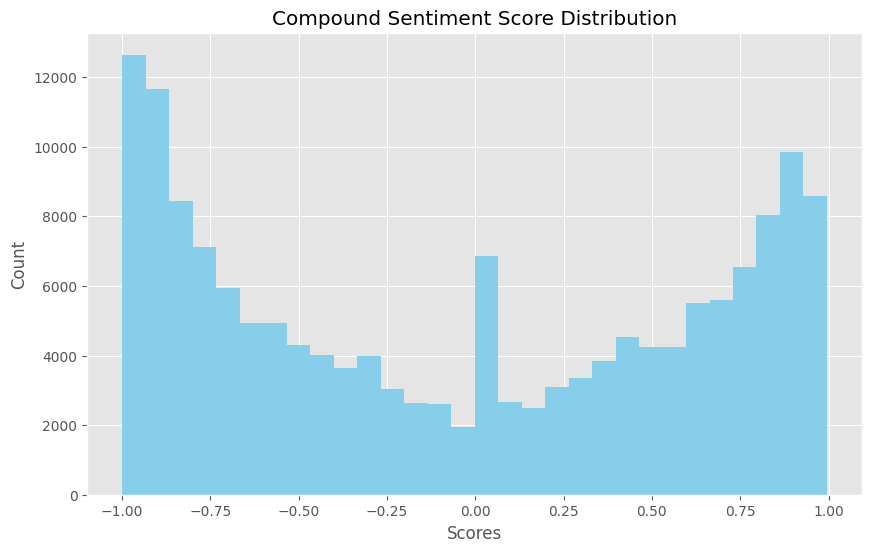

In [24]:
useful_train.sentiment.hist(color='skyblue', bins=30)
plt.title('Compound Sentiment Score Distribution')
plt.xlabel('Scores')
plt.ylabel('Count');

(0.0, 200.0)

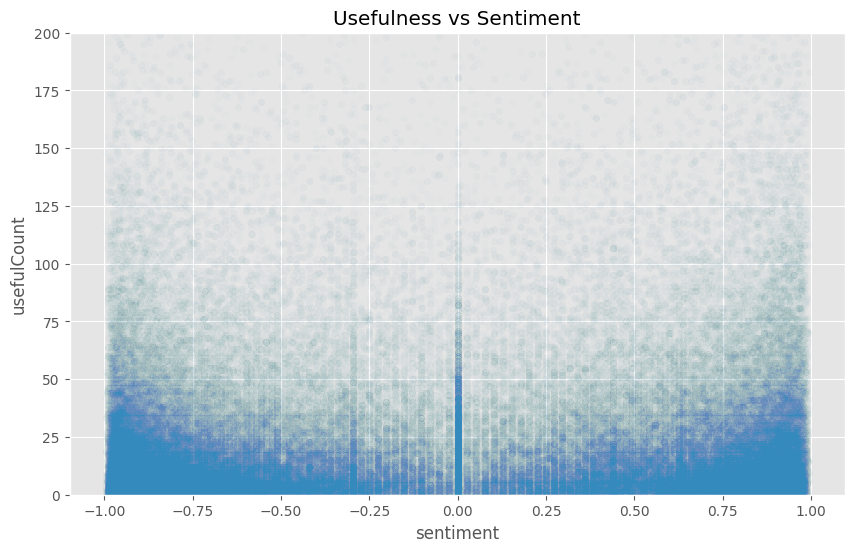

In [25]:
useful_train.plot(x='sentiment', y='usefulCount', kind='scatter', alpha=0.01)
plt.title('Usefulness vs Sentiment')
plt.ylim(0,200)

In [26]:
temp_ls = []
for i in range(1,11):
  temp_ls.append(np.sum(useful_train[useful_train.rating == i].sentiment)/np.sum(useful_train.rating==i))

([<matplotlib.axis.XTick at 0x7dc55c3b1510>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

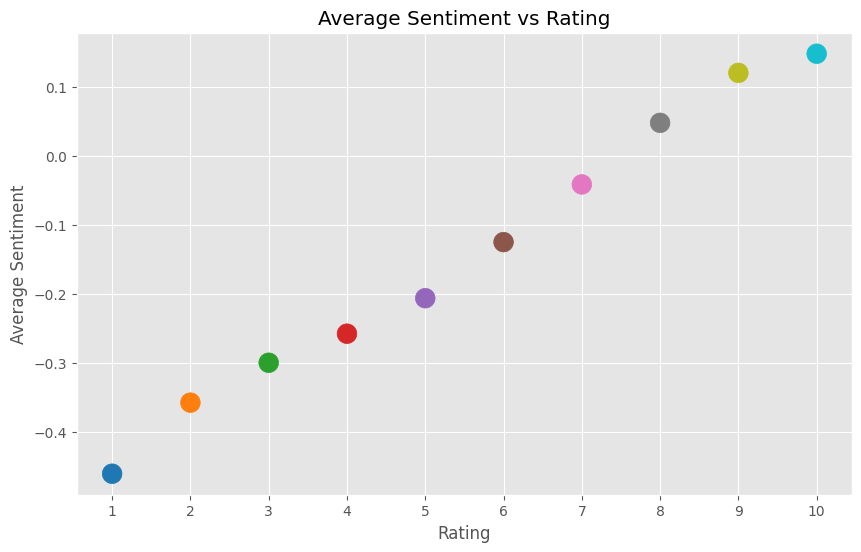

In [27]:
plt.scatter(x=range(1,11), y=temp_ls, c=range(1,11), cmap='tab10', s=200)
plt.title('Average Sentiment vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment')
plt.xticks([i for i in range(1,11)])

Let's see what other meaningful insights we can get from the data. Find the best and worst reviewed drugs overall:

In [28]:
# Create a list of all drugs and their average ratings, cast to dataframe

rate_ls = []

for i in train.drugName.unique():
  # Only consider drugs that have at least 10 ratings
  if np.sum(train.drugName == i) >= 10:
    rate_ls.append((i, np.sum(train[train.drugName == i].rating) / np.sum(train.drugName == i)))
avg_rate = pd.DataFrame(rate_ls)

In [29]:
# Sort drugs by their ratings, look at top 10 best and worst rated drugs
avg_rate = avg_rate.sort_values(by=[1], ascending=False).reset_index(drop=True)
avg_rate[:10]

,0,1
0,Chlorpheniramine / hydrocodone / pseudoephedrine,10.000000
1,Zutripro,10.000000
2,Silver sulfadiazine,9.972222
3,Drixoral Cold and Allergy,9.948718
4,Dexbrompheniramine / pseudoephedrine,9.947368
5,Emend,9.900000
6,Aprepitant,9.900000
7,Tegaserod,9.812500
8,Zelnorm,9.687500
9,Cyanocobalamin,9.666667


In [30]:
avg_rate[-10:]

,0,1
1371,Prevnar 13,3.363636
1372,Fosamax,3.166667
1373,Blisovi 24 Fe,3.088889
1374,Opdivo,3.083333
1375,Miconazole,3.033000
1376,Monistat 7,3.032258
1377,Alendronate,2.954545
1378,Yuvafem,2.318182
1379,Monistat 1-Day or Night Combination Pack,1.416667
1380,ProAir RespiClick,1.193548


# Best and Worst Drugs by Condition
Let's find the highest and lowest rated drugs for each condition.
This information will be helpful for a user who is looking for medication for a specific condition...

In [31]:
# Make dictionary of conditions, each value will be a dataframe of all of the drugs used to treat the given condition
help_dict = {}

# Iterate over conditions
for i in train.condition.unique():

    temp_ls = []

    # Iterate over drugs within a given condition
    for j in train[train.condition == i].drugName.unique():

        # If there are at least 10 reviews for a drug, save its name and average rating in temporary list
        if np.sum(train.drugName == j) >= 10:
            temp_ls.append((j, np.sum(train[train.drugName == j].rating) / np.sum(train.drugName == j)))

    # Save temporary list as a dataframe as a value in help dictionary, sorted best to worst drugs
    help_dict[i] = pd.DataFrame(data=temp_ls,
                                columns=['drug', 'average_rating']).sort_values(
                                    by='average_rating',ascending=False).reset_index(drop=True)

Now we've got a very useful help_dict dictionary

WE can simply index the dictionary by a specific condition to see the top rated drugs for that condition. For example, let's look at the top 10 drugs for birth control:

In [32]:
help_dict['Birth Control'].iloc[:10]

,drug,average_rating
0,Plan B,8.674917
1,Lybrel,7.600000
2,Ortho Evra,7.470320
3,Kyleena,7.463576
4,Levonorgestrel,7.391031
5,Ortho-Cept,7.250000
6,Skyla,7.246359
7,Copper,7.235197
8,Beyaz,7.042553
9,Dienogest / estradiol,6.875000


In [33]:
help_dict['Depression'].iloc[:10]

,drug,average_rating
0,Desipramine,9.285714
1,Xanax XR,8.947368
2,Alprazolam,8.933144
3,Xanax,8.881579
4,Parnate,8.763158
5,St. john's wort,8.739130
6,Nefazodone,8.727273
7,Methylin ER,8.700000
8,Clomipramine,8.680000
9,Phenelzine,8.666667


In [34]:
help_dict['Depression'].iloc[:-10]

,drug,average_rating
0,Desipramine,9.285714
1,Xanax XR,8.947368
2,Alprazolam,8.933144
3,Xanax,8.881579
4,Parnate,8.763158
...,...,...
71,Viibryd,6.522667
72,Olanzapine,6.485612
73,Aripiprazole,6.420000
74,Risperdal,6.413793


Drugs used for birth control are listed, from best to worst average rating. Let's the top 10 best drugs for some other conditions.

In [35]:
help_dict['Acne'].iloc[:10]

,drug,average_rating
0,Benzoyl peroxide,8.869565
1,Benzaclin,8.865385
2,Milk of Magnesia,8.833333
3,Benzoyl peroxide / erythromycin,8.750000
4,Magnesium hydroxide,8.710000
5,Accutane,8.427273
6,Isotretinoin,8.392453
7,Onexton,8.357143
8,Retin-A,8.342857
9,Claravis,8.250000


This information is really useful! We can easily find the best drugs for any given condition.

We can also see the worst rated drugs:

In [36]:
help_dict['Acne'].iloc[-10:]

,drug,average_rating
64,Ethinyl estradiol / norethindrone,5.591930
65,Sulfamethoxazole / trimethoprim,5.557875
66,Junel Fe 1 / 20,5.404545
67,Loryna,5.162791
68,Tri-Previfem,4.984615
69,Junel Fe 1.5 / 30,4.961538
70,Gildess Fe 1.5 / 30,4.791667
71,SMZ-TMP DS,4.666667
72,Gildess Fe 1 / 20,4.594286
73,Estarylla,3.707317


# Machine Learning Models
It's now time to begin trying different machine learning models and try treating this first as a classification problem, and then as a regression problem.

# Classification with sk-learn and Random Forests

We will apply random forests for the purpose of sentiment analysis of reviews. The obvious starting question for such an approach is how can we convert the raw text of the review into a data representation that can be used by a numerical classifier. To this end, we will use the process of vectorization. By vectorizing the "review" column, we can allow widely-varying lengths of text to be converted into a numerical format which can be processed by the classifier.

This is achieved via the TF-IDF method which involves creating tokens(i.e. individual words or groups of words extracted from the text).Once the list of tokens is created, they are assigned an index integer identifier which allows them to be listed. We can then count the number of words in the document and normalize them in such a way that de-emphasizes words that appear frequently (like "a", "the" etc). This creates what is known as a bag(multi-set) of words. Such a representation associates a real-valued vector to each review representing the importance of the tokens(words) in the review. This represents the entire corpus of reviews as a large matrix where each row of the matrix represents one of the reviews and each column represents a token occurence.

Term-Frequency Inverse Document-Frequency(TF-IDF) is a way of handling the excessive noise due to words such as "a", "the", "he", "she" etc. Clearly such common words will appear in many reviews, but do not provide much insight into the sentiment of the text and their high frequency tends to obfuscate words that provide significant insight into sentiment. More details about the method can be found on "wikipedia".

The main limitation of this approach is that it does not take into account the relative position of words within the document. Here we are only using the frequency of occurence. Nevertheless, it works pretty well for this data set.

In [37]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train.review)

# transforms test reviews to above vectorized format
X_test = vectorizer.transform(test.review)

the simplest type of model we can attempt to fit on this data is the Naive Bayes classifier. We will first test Naive Bayes on a binarized version of the rating column which attempts to identify which reviews are favorable. We define a favorable review as one which received a rating above 5. Given the simplest size involved for our data set. WE choose Naive Bayes over other classifiers due to its scalability.

In [38]:
# Create a column with binary rating indicating the polarity of a review
train['binary_rating'] = train['rating'] > 5

y_train_rating = train.binary_rating
clf = MultinomialNB().fit(X_train, y_train_rating)

# Evaluates model on test set
test['binary_rating'] = test.rating > 5
y_test_rating = test.binary_rating
pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Accuracy: 0.7527247703009337
Confusion Matrix
[[ 3233   321]
 [12974 37238]]


### What is a Confusion Matrix?

A confusion matrix is a table that summarizes the performance of a classification model by comparing actual labels with predicted labels. It shows four key values for a binary classification:

- **True Positive (TP)**: The model correctly predicted the positive class.
- **True Negative (TN)**: The model correctly predicted the negative class.
- **False Positive (FP)** (Type I error): The model incorrectly predicted the positive class (predicted positive, but it was actually negative).
- **False Negative (FN)** (Type II error): The model incorrectly predicted the negative class (predicted negative, but it was actually positive).

### Example of a Confusion Matrix

For a binary classification problem (like spam detection), the confusion matrix looks like this:

|                 | Predicted Positive | Predicted Negative |
|-----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)   | False Negative (FN)   |
| **Actual Negative** | False Positive (FP)  | True Negative (TN)    |

### Explanation of Each Term
- **TP**: The number of correct positive predictions. (Actual: Yes, Predicted: Yes)
- **TN**: The number of correct negative predictions. (Actual: No, Predicted: No)
- **FP**: The number of incorrect positive predictions. (Actual: No, Predicted: Yes)
- **FN**: The number of incorrect negative predictions. (Actual: Yes, Predicted: No)

### Easiest Way to Interpret the Confusion Matrix

1. **Accuracy**: The proportion of correctly classified cases out of the total cases.
   \[
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   \]

2. **Precision**: The proportion of correctly predicted positive observations to the total predicted positives.
   \[
   \text{Precision} = \frac{TP}{TP + FP}
   \]

3. **Recall (Sensitivity)**: The proportion of actual positives that were correctly classified.
   \[
   \text{Recall} = \frac{TP}{TP + FN}
   \]

4. **F1-Score**: The harmonic mean of precision and recall.
   \[
   \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   \]

These metrics help assess the model's performance from different perspectives.

### Visual Example
Imagine a classifier that tries to detect spam emails:
- **TP**: 50 emails correctly detected as spam.
- **TN**: 40 emails correctly detected as not spam.
- **FP**: 10 emails incorrectly detected as spam.
- **FN**: 5 emails incorrectly detected as not spam.

The confusion matrix would look like:

|                 | Predicted Spam    | Predicted Not Spam |
|-----------------|-------------------|--------------------|
| **Actual Spam** | 50                | 5                  |
| **Actual Not Spam** | 10            | 40                 |

In this example:
- Accuracy = (50 + 40) / (50 + 40 + 10 + 5) = 0.86 (86%)
- Precision = 50 / (50 + 10) = 0.83 (83%)
- Recall = 50 / (50 + 5) = 0.91 (91%)

This breakdown gives you a good sense of where the model performs well and where it may need improvement.

In [39]:
# Trains random forest classifier

start = time.time()
rfc_rating = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10000, min_samples_split=0.001)
rfc_rating.fit(X_train, y_train_rating)
end = time.time()
print("Training time: %s" % str(end-start))

# Evaluate model on test set
pred = rfc_rating.predict(X_test)

print("Accuracy: %s" % str(rfc_rating.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Training time: 242.66509819030762
Accuracy: 0.8310084439980657
Confusion Matrix
[[ 7252   131]
 [ 8955 37428]]


# Classification with Kereas


*   Neural networks usually scale very well with lots of data, and that's exactly what we have here(150,000 training examples, 50,000 test examples). We actually couldn't run all of these sk-learn as the kernel would just crash after a couple of minutes.However, keras plays with this much data very nicely.
*   While we are sticking to a simple NN in this kernel, other types of NN architecture can deal with natural language processing problems very well(long short term memory models, other types of recurrent networks).

*   Keras gives us lots of freedom to play with hyperparameters and design a network that would be best suited for our data.





In [66]:
b = "'@#$%^()&*;!.-"
X_train = np.array(train['review'])
X_test = np.array(test['review'])

def clean(X):
  for index, review in enumerate(X):
    for char in b:
      X[index] = X[index].replace(char, "")
  return(X)

X_train = clean(X_train)
X_test = clean(X_test)
print(X_train[:2])

['"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'
 '"My son is halfway through his fourth week of Intuniv We became concerned when he began this last week, when he started taking the highest dose he will be on For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation very unusual for him I called his doctor on Monday morning and she said to stick it out a few days See how he did at school, and with getting up in the morning The last two days have been problem free He is MUCH more agreeable than ever He is less emotional a good thing, less cranky He is remembering all the things he should Overall his behavior is better \r\nWe have tried many different medications and so far this is the most effective"']


Doing some preprocessing by removing all symbols from the review.

In [ ]:
# # Install Keras and TensorFlow if not already installed
# !pip install tensorflow

# # Install scikit-learn for CountVectorizer and TfidfVectorizer
# !pip install -U scikit-learn

# # Install NLTK for natural language processing tools
# !pip install nltk

# # Install Gensim for Word2Vec
# !pip install gensim


In [67]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from keras.utils import to_categorical
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk
nltk.download('stopwords')

vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'),lowercase=True, max_features=5000)
#vectorizer = TfidfVectorizer(binary=True, stop_words=stopwords.words('english'), lowercase=True, max_features=5000)
test_train = np.concatenate([X_train, X_test])
print(test_train.shape)
X_onehot = vectorizer.fit_transform(test_train)
stop_words = vectorizer.get_stop_words()
print(type(X_onehot))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(215063,)
<class 'scipy.sparse._csr.csr_matrix'>




*   I use a CountVectorizer to vectorizer each of the different
reviews into 5000 features row vectors. This is a very similar approach to vectorization as the TDIF explained above.
*   This vectorizer is also set to not add in very common words such as "and" and "the" as features. This is specified in stop_words.








In [68]:
print(X_onehot.shape)
print(X_onehot.toarray())

(215063, 5000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Sanity checking to see if the dimensions make sense, then peeking at what the actual X_onehot matrix looks like. We have our trimmed m number of examples, as well as 5000 columns so this looks right!

In [69]:
# Use get_feature_names_out() instead of get_feature_names()
names_list = vectorizer.get_feature_names_out()

# Process names_list as you were doing before
names = [[i] for i in names_list]
names = Word2Vec(names, min_count=1)

# Print the number of words in the vocabulary
print(len(names.wv.key_to_index))

# Print the first 5 words in the vocabulary
print(names.wv.index_to_key[:5])

5000
['00', 'zyrtec', 'zyprexa', 'zyban', 'zone']


In [70]:
def score_transform(X):
  y_reshaped = np.reshape(X['rating'].values, (-1, 1))
  for index, val in enumerate(y_reshaped):
    if val >= 8:
      y_reshaped[index] = 1
    elif val >= 5:
      y_reshaped[index] = 2
    else:
      y_reshaped[index] = 0
  y_result = to_categorical(y_reshaped)
  return y_result

  print(X_onehot)



*   Creating a helper function to easily create our "y" labels. We need to transform the review column to a "m" number of reviews by 3 columns, where index "0" is negative, "1" is positive and "2" is neutral.   



In [71]:
y_train_test = pd.concat([train, test], ignore_index=True)
y_train = score_transform(y_train_test)
print(y_train)
print(y_train.shape)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
(215063, 3)


In [72]:
from keras.utils import to_categorical

# Assuming y_train is in integer format (0, 1, 2 for three classes)
y_train_onehot = to_categorical(y_train, num_classes=3)

# Update y_train_slice with the one-hot encoded labels
y_train_slice = y_train_onehot[:-53866]
y_val = y_train_onehot[157382:157482]

In [73]:
y_train_slice.shape

(161197, 3, 3)

In [74]:
y_val.shape

(100, 3, 3)

In [75]:
import numpy as np
from numpy.random import seed
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Setting the random seed for reproducibility
np.random.seed(1)

# Assuming vectorizer is defined and fitted earlier
input_dim = len(vectorizer.get_feature_names_out())  # 5000 in your case

# Initializing the model
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=input_dim))
model.add(Dense(units=3, activation='softmax'))

# Compiling the model with categorical_crossentropy for multi-class classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Convert the SciPy sparse matrix to a dense NumPy array if necessary
if isinstance(X_onehot, np.ndarray) is False:
    X_onehot = X_onehot.toarray()

# Prepare training and validation data
X_train_1 = X_onehot[:-53866]
y_train_slice_1 = y_train[:-53866]
X_val_1 = X_onehot[157382:157482]
y_val_1 = y_train[157382:157482]

# Ensure all data is in dense format
print("Training data shape:", X_train_1.shape, y_train_slice_1.shape)
print("Validation data shape:", X_val_1.shape, y_val_1.shape)

# Fit the model using the dense arrays
history = model.fit(X_train_1, y_train_slice_1,
                    epochs=6, batch_size=128, verbose=1,
                    validation_data=(X_val_1, y_val_1))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               1280256   
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1281027 (4.89 MB)
Trainable params: 1281027 (4.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training data shape: (161197, 5000) (161197, 3)
Validation data shape: (100, 5000) (100, 3)
Epoch 1/6
1260/1260 [==============================] - 9s 6ms/step - loss: 0.6261 - accuracy: 0.7502 - val_loss: 0.4211 - val_accuracy: 0.8200
Epoch 2/6
1260/1260 [==============================] - 8s 6ms/step - loss: 0.4073 - accuracy: 0.8520 - val_loss: 0.2135 - val_accuracy: 0.9400
Epoch 3/6
1260/1260 [=============

To explain it in detail:

The batch size we specified is 128.
So, for each epoch, the number of batches will be the total number of training samples divided by the batch size:
161197/128≈1260 batches.


If you want to train the model on all 161,197 samples in one batch (batch size equal to the total number of samples), you can set the batch size to the total number of samples. However, this isn't recommended for most scenarios due to memory limitations and poorer generalization. Smaller batch sizes like 32, 64, or 128 are typically used to balance training efficiency and model performance.

In [76]:
scores = model.evaluate(X_train_1[157482:], y_train_slice_1[157482:], verbose=1)

117/117 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9989


In [77]:
scores[1]

0.9989233016967773



*   I have exprimented with different numbers of epochs and batch sizes, as well, and found roughly 6 epochs and a batch size of 128 to be optimal.

*   Anything more than 6 epochs resulted in the model beginning to overtrain and lose accuracy.


*   Before running preprocessing on the reviews by eliminating symbols, the validation accuracy stayed around 84%. Now it scores a perfect 100% on the 100 examples.






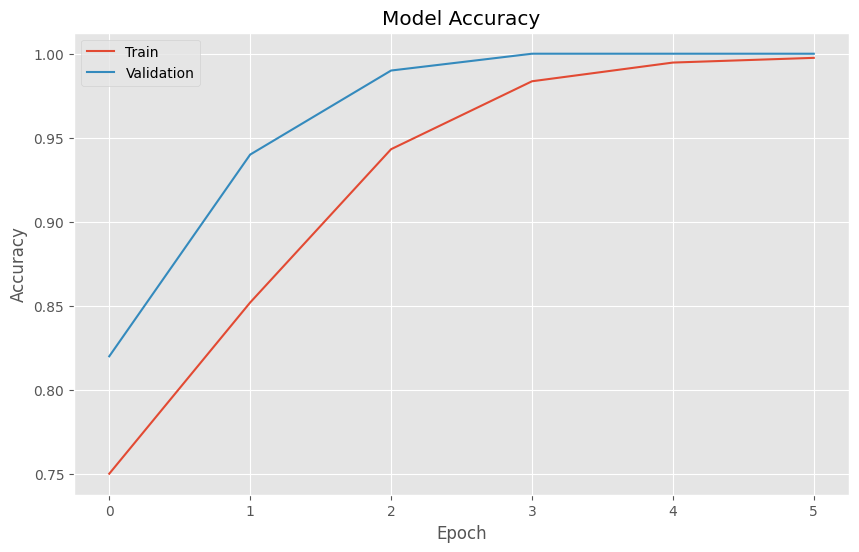

In [78]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


This model predicts the if the review is positive, negative or neutral with a ~ 89.4% accuracy, according to this test set output score.

**Feature Analysis**



*   This section was our idea of attempting to derive importance out of our vectorized features by k-clustering by similarity, as keras has no built-in function to check feature importance.




Taking a random sample of 5000 reviews for training our kclusterer on.

In [84]:
from gensim.models import Word2Vec
import numpy as np

# Assuming X_train contains text data
all_names = [str(i).split() for i in X_train]  # Tokenize text data

# Generate random sample of 5000 sentences from all_names
np.random.seed(1)
all_names_rand = [all_names[np.random.randint(low=1, high=150000)] for i in range(5000)]

# Print the number of random samples selected
print(len(all_names_rand))  # Should be 5000

# Train the Word2Vec model on tokenized sentences
all_names_list = Word2Vec(all_names_rand, min_count=1)

# If you want the original text tokens (not vectors), print `all_names_rand`
print(all_names_rand[0])  # This will print the first tokenized sentence (words)

# If you want the word vector of the first word in the vocabulary, you can do:
first_word = all_names_list.wv.index_to_key[0]  # First word in the vocabulary
print(f"First word: {first_word}")  # Print the first word
print(f"Vector for '{first_word}': {all_names_list.wv[first_word]}")  # Print its vector


5000
['"Blemish,', 'acne', 'and', 'crying', 'all', 'the', 'time,', 'that039s', 'what', 'I', 'got', 'from', 'Minastrin', '24', 'Fe"']
First word: I
Vector for 'I': [-1.1160729   0.4669228   1.0922397   0.63875794 -0.9369602  -1.5831326
  1.0819428   2.799101   -0.71934295 -1.2863767   0.22002918 -1.3676189
 -1.063751    0.60911983  0.41715303 -1.1047196   0.8423249   0.30432123
 -0.43393606 -1.8078736   0.55993766  0.21579386  0.6729799   0.2880233
  0.7825052  -0.5590433  -0.17145543  0.86441594 -0.86429304  0.06977837
  0.05462762 -0.1711327   0.98996717 -1.4514844  -0.48622546  0.27476454
  1.4141384  -0.5849746  -0.35224277 -0.97246164  0.03465651 -0.05555946
 -1.349331   -0.29608074  0.14793223  0.01844363 -1.4522783   0.0155076
  1.0355707   0.53144914 -0.35991624  0.17320503 -0.5380074   0.35574326
  0.9764754   0.18657975  1.0750688  -0.57229227 -1.0207183   0.9471058
 -0.9976471  -0.02770346  0.5534636  -2.0207484  -0.55049324  0.80307007
 -0.577148    0.778675   -0.93854123  0

In [87]:
import nltk
from nltk.cluster import KMeansClusterer
import numpy as np
from gensim.models import Word2Vec

# Extract the word vectors for each word in the vocabulary
word_vectors = [all_names_list.wv[word] for word in all_names_list.wv.index_to_key]

# Convert the list of vectors to a NumPy array
word_vectors_np = np.array(word_vectors)

# Initialize the KMeansClusterer with k=5 clusters and cosine distance metric
num_clusters = 5
kclusterer_all = KMeansClusterer(num_clusters, distance=nltk.cluster.util.cosine_distance, repeats=10)

# Perform clustering on the word vectors
assigned_clusters_all = kclusterer_all.cluster(word_vectors_np, assign_clusters=True)

# Print the number of clusters assigned (should be the same as the number of words in the vocabulary)
print(f"Number of words clustered: {len(assigned_clusters_all)}")

# Optional: print the clusters and words assigned to them
for i, word in enumerate(all_names_list.wv.index_to_key):
    print(f"Word: {word} is in cluster {assigned_clusters_all[i]}")

Streaming output truncated to the last 5000 lines.
Word: 60039s70039s is in cluster 1
Word: Savela is in cluster 0
Word: 6/10 is in cluster 0
Word: beforehand is in cluster 1
Word: urination" is in cluster 3
Word: apitite is in cluster 4
Word: endured" is in cluster 3
Word: once" is in cluster 2
Word: "Midrin is in cluster 1
Word: Contact is in cluster 4
Word: Appointment is in cluster 3
Word: tingled, is in cluster 1
Word: Esophagus is in cluster 0
Word: immediatley is in cluster 1
Word: standing, is in cluster 1
Word: feedback, is in cluster 0
Word: muscle/bone is in cluster 4
Word: hat is in cluster 4
Word: expiring" is in cluster 2
Word: Phenergren is in cluster 4
Word: unplanned is in cluster 4
Word: necessary" is in cluster 1
Word: "FANTASTIC is in cluster 4
Word: accountable" is in cluster 4
Word: 25/month is in cluster 4
Word: print is in cluster 2
Word: bras, is in cluster 1
Word: Drops/Spray is in cluster 4
Word: circumstances,so is in cluster 1
Word: avaiable is in cluster 3



*   Just running kmeans on the feautures themselves resulted into very inaccurate clustering and things made a lot more sense when I kept the sentences intact, as there was alot more information retained.

**Key Points:**

**1.Word Vectors:** The Word2Vec model is used to obtain the vector embeddings for each word in all_names_rand. These vectors are stored in word_vectors_np.


**2.Clustering:** The KMeansClusterer from nltk is initialized with 5 clusters (num_clusters = 5) and uses the cosine_distance metric. The word vectors are passed to the cluster function, which assigns each vector to a cluster.

**3.Printing Results:** After clustering, the words are mapped to their assigned clusters, and the results are printed.



**Simple Regression with sk-learn**

Just curious about framing the problem as a linear regression one, so this was following exploration of that.

In [88]:
#Re-Importing the datasets and libraries
url_1_test='https://raw.githubusercontent.com/ArslanAmanov/AI-ML-DL/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/drugsComTest_raw.csv'
url_2_train='https://raw.githubusercontent.com/ArslanAmanov/AI-ML-DL/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/drugsComTrain_raw.csv'
test = pd.read_csv(url_1_test)
train = pd.read_csv(url_2_train)

In [90]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Get the review text
reviews= np.vstack((train.review.values.reshape(-1, 1),
                    test.review.values.reshape(-1, 1)))

# Set up a function to re-vectorize reviews.  This time binary is set to false, we only have 500 max features and min
# and max_df arguments have been set.

vectorizer = CountVectorizer(binary = False, stop_words=stopwords.words('english'),
                             lowercase=True, min_df=3, max_df=0.9, max_features=500)

# Vectorize reviews
X = vectorizer.fit_transform(reviews.ravel()).toarray()

# Get ratings
ratings = np.concatenate((train.rating.values, test.rating.values)).reshape(-1,1)

y=ratings

X_train, X_test = X[:train.values.shape[0],:], X[train.values.shape[0]:, :]
y_train, y_test = y[:train.values.shape[0]], y[train.values.shape[0]:]

In [91]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((215063, 500),
 (215063, 1),
 (161297, 500),
 (161297, 1),
 (53766, 500),
 (53766, 1))

In [92]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train[:5000], y_train[:5000])

LinearRegression()

In [93]:
pred = lin_reg.predict(X_train[5000:])

In [94]:
np.sum(np.abs(y_train[5000:] - pred[:]))/(161297-5000)

2.321901928876773

We end predicting the score of the review with only 2.3 error! Considering how little preprocessing, feature engineering, hyperparameter tuning and model experimentation I did, this is pretty impressive.

**The End !**



1.   It seems like the neural network gives the best overall accuracy with 89.4%
2.   This could've been framed as either a classification or regression problem depending on the approach.

3.   Perhaps, trying to do some feature exploration in a different way would be helpful in developing insights and meaningfull conclusions.
4.   Exploring different NN architecture could've been very beneficial, as recurrent nets are known to work very well for NLP problems.

5.   Overall  this was a very interesting project from Team NDl notebook and I learned quite a lot.








Research & Learning based info  

A "random seed" or simply "seed" in the context of random number generation is a starting point used in the generation of a sequence of random numbers. The seed determines the initial internal state of the pseudorandom number generator, and it's used to ensure that the sequence of random numbers it generates is reproducible.

Here’s why setting a random seed is important in programming and computational simulations:

1. **Reproducibility**: Setting the same seed allows you to generate the same sequence of "random" numbers multiple times. This is crucial in scientific computing and data analysis where reproducibility of results is a must. For example, if you're developing a model or running simulations, using a seed ensures that your results can be replicated exactly by yourself or others, assuming the same code and seed are used.

2. **Debugging**: When debugging code that involves random number generation, it's useful to have a deterministic output. By setting a seed, you ensure that each run of your code with the same inputs will produce the same output, making it easier to isolate and troubleshoot problems.

3. **Testing**: In testing environments, especially in unit tests where outputs need to be predictable, setting a seed helps ensure that tests are not flaky (i.e., they don’t fail randomly).

4. **Model Training**: In machine learning, setting a random seed can help ensure consistent initialization of model parameters, consistent splitting of data into training and test sets, and other aspects of the training process that involve randomization. This consistency is helpful when comparing the performance of different models or configurations.

In Python, setting a seed in `numpy` with `np.random.seed()` will affect all subsequent uses of functions in the numpy random module in the current runtime environment. Similarly, other libraries that handle random number generation, like `random`, `tensorflow`, or `torch`, also allow you to set seeds for their respective random number generators. Each library manages its seed independently, so you might need to set seeds for multiple libraries if your project involves several of them.

### Model Initialization
```python
model = Sequential()
```
- **`Sequential`**: This initializes a new sequential model. A sequential model in Keras is a linear stack of layers where each layer has exactly one input tensor and one output tensor. It's the simplest kind of model for neural networks in Keras, suitable for most problems that involve mapping an input to an output.

### Adding Layers to the Model
```python
model.add(Dense(units=256, activation='relu', input_dim=input_dim))
```
- **`Dense`**: This adds a densely-connected (also known as fully connected) neural network layer. Each neuron in a dense layer receives input from all neurons of the previous layer, hence densely connected.
- **`units=256`**: This specifies the number of neurons in this layer. Here, it's set to 256, meaning this layer will have 256 neurons.
- **`activation='relu'`**: The activation function for the neurons in this layer. 'ReLU' stands for Rectified Linear Unit, a popular activation function in deep learning. It outputs the input directly if it is positive, otherwise, it will output zero. It introduces non-linearity into the model, helping it learn more complex patterns.
- **`input_dim=input_dim`**: This sets the number of input features the network expects for the first layer. Here, `input_dim` should be defined somewhere in your code as the size of your input data features.

```python
model.add(Dense(units=3, activation='softmax'))
```
- **`units=3`**: This is another dense layer, now with 3 neurons. This typically corresponds to the number of classes in a classification task.
- **`activation='softmax'`**: The softmax activation function is used on the last layer of a classifier to normalize the output to a probability distribution over predicted output classes. It’s used when you want to classify the data into multiple categories.

### Compiling the Model
```python
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
```
- **`compile`**: This configures the model for training.
- **`loss='categorical_crossentropy'`**: The loss function used to measure how well the model performs during training. Minimizing this value will "steer" the model in the right direction. Categorical crossentropy is used when there are two or more label classes. It expects labels to be provided in a one_hot representation.
- **`optimizer='adam'`**: The method used to adjust the attributes of your neural network such as weights and learning rate in order to reduce losses. Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks.
- **`metrics=['accuracy']`**: This is a list of metrics to be evaluated by the model during training and testing. Here, we only use accuracy, which measures the percentage of correct predictions.

This setup is typical for a multi-class classification problem where you have input data that is fed through a neural network which predicts one of several classes. Each line of the code is constructing this neural network layer-by-layer and then setting it up for learning from the training data.